Please fill out:
Student name: Tania Chopra
Instructor name: Hardik
Course: Data Analytics Transform



# Importing libraries and reading the KC_Housing dataset

All libraries and functions predicted to be nececssary are imported. Afterwards, target data is imported and displayed via pandas dataframe.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [4]:
df=pd.read_csv("kc_house_data.csv")

In [11]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,"221,900.0",3,1.0,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5,-122.3,1340,5650
1,6414100192,12/9/2014,"538,000.0",3,2.2,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,"1,991.0",98125,47.7,-122.3,1690,7639


In [3]:
pd.options.display.float_format = '{:,.1f}'.format
df.describe() 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,"21,597.0","21,597.0","21,597.0","21,597.0","21,597.0","21,597.0","21,597.0","19,221.0","21,534.0","21,597.0","21,597.0","21,597.0","21,597.0","17,755.0","21,597.0","21,597.0","21,597.0","21,597.0","21,597.0"
mean,"4,580,474,287.8","540,296.6",3.4,2.1,"2,080.3","15,099.4",1.5,0.0,0.2,3.4,7.7,"1,788.6","1,971.0",83.6,"98,078.0",47.6,-122.2,"1,986.6","12,758.3"
std,"2,876,735,715.7","367,368.1",0.9,0.8,918.1,"41,412.6",0.5,0.1,0.8,0.7,1.2,827.8,29.4,399.9,53.5,0.1,0.1,685.2,"27,274.4"
min,"1,000,102.0","78,000.0",1.0,0.5,370.0,520.0,1.0,0.0,0.0,1.0,3.0,370.0,"1,900.0",0.0,"98,001.0",47.2,-122.5,399.0,651.0
25%,"2,123,049,175.0","322,000.0",3.0,1.8,"1,430.0","5,040.0",1.0,0.0,0.0,3.0,7.0,"1,190.0","1,951.0",0.0,"98,033.0",47.5,-122.3,"1,490.0","5,100.0"
50%,"3,904,930,410.0","450,000.0",3.0,2.2,"1,910.0","7,618.0",1.5,0.0,0.0,3.0,7.0,"1,560.0","1,975.0",0.0,"98,065.0",47.6,-122.2,"1,840.0","7,620.0"
75%,"7,308,900,490.0","645,000.0",4.0,2.5,"2,550.0","10,685.0",2.0,0.0,0.0,4.0,8.0,"2,210.0","1,997.0",0.0,"98,118.0",47.7,-122.1,"2,360.0","10,083.0"
max,"9,900,000,190.0","7,700,000.0",33.0,8.0,"13,540.0","1,651,359.0",3.5,1.0,4.0,5.0,13.0,"9,410.0","2,015.0","2,015.0","98,199.0",47.8,-121.3,"6,210.0","871,200.0"


In [10]:
df.head(2).sort_values('date',ascending=False)
#Data is for the properties sold between 2015 and 2014

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,"538,000.0",3,2.2,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,"1,991.0",98125,47.7,-122.3,1690,7639
0,7129300520,10/13/2014,"221,900.0",3,1.0,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5,-122.3,1340,5650


The data reveals 21597 entries of houses corresponding to 21 different attributes. Since all data is allocated in one file, there is no need to query from multiple sources or merge data. From a business perspective, future clientele will most likely want to understand what attributes influence the price of a home. Therefore, the target will be price.

# Dealing with Null Values

In [12]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We have null values in Waterfront, View and Yr_renovated columns. Dealing with these null values before we move to the next step. Replacing these null values with their median values.

In [20]:
df.waterfront = df.waterfront.fillna(df['waterfront'].median())

In [16]:
df.view = df.view.fillna(df['view'].median())

In [18]:
df['yr_renovated'] = df['yr_renovated'].fillna(df['yr_renovated'].median())

In [21]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Ensuring Correct Data Types and adding required columns

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Potential issues with the data so far:

* The sqft of the basement is a str, but should be a float.

* waterfront, grade, basement, and condition should all be categorical data- creating new columns to identify these features in a property.

* changing the yr_built into age of the property column. further to identify how the age of the home effects the sale price.

In [23]:
# further analysis shows sqft basement has ''?'' instances in the data. 
sum(df['sqft_basement'] =='?') 

454

In [24]:
# Replace ? with 'sqft_living'- 'sqft_above'
df.loc[df['sqft_basement'] == '?', 'sqft_basement'] = df['sqft_living'] - df['sqft_above']

In [25]:
# Change sqft_basement value to float
df.sqft_basement = df.sqft_basement.astype("float64") 

In [26]:
# Add column to indicate a basement
df['waterfronty'] = np.where(df['waterfront']!=0, 'YES', 'NO')

In [27]:
# Add column to indicate a basement
df['basement'] = np.where(df['sqft_basement']>1, 'YES', 'NO')

In [28]:
# Add column to indicate renovation
df['renovated'] = np.where(df['yr_renovated']!=0, 'YES', 'NO')

In [29]:
#change 'yr_built' column to 'age' of house column
df['age'] = df['yr_built'].apply(lambda x: 2022 - x)
df = df.drop(['yr_built'], axis=1)

# Transforming categorical data - for easy understanding

'Grade' to 4 categories: Low, Average, Above Average, and Excellent

In [30]:
# Lows including 3,4,5 and 6 
df['grade'].replace(3,'Low Grade', inplace=True)
df['grade'].replace(4,'Low Grade', inplace=True)
df['grade'].replace(5,'Low Grade', inplace=True)
df['grade'].replace(6,'Low Grade', inplace=True)

# Average including 7 Average 
df['grade'].replace(7,'Average Grade', inplace=True)

# Average Above including 8 Good,9 Better
df['grade'].replace(8,'Above Average Grade', inplace=True)
df['grade'].replace(9,'Above Average Grade', inplace=True)

# Excellent including 10 Very Good, 11 Excellent,12 Luxury and 13 Mansion
df['grade'].replace(10,'Excellent Grade', inplace=True)
df['grade'].replace(11,'Excellent Grade', inplace=True)
df['grade'].replace(12,'Excellent Grade', inplace=True)
df['grade'].replace(13,'Excellent Grade', inplace=True)

'Condition' to 2 categories: "Below 3" and " 3 and above"

In [32]:
# Low-Average including Poor, Fair, Average
df['condition'].replace(1,'Below 3', inplace=True)
df['condition'].replace(2,'Below 3', inplace=True)

# Good including Good and Very Good
df['condition'].replace(3,'3 and above', inplace=True)
df['condition'].replace(4,'3 and above', inplace=True)
df['condition'].replace(5,'3 and above', inplace=True)

In [34]:
#Lets look at the age column to analyse the data 

df['age'].value_counts()

8      559
16     453
17     450
18     433
19     420
      ... 
89      30
121     29
120     27
87      24
88      21
Name: age, Length: 116, dtype: int64

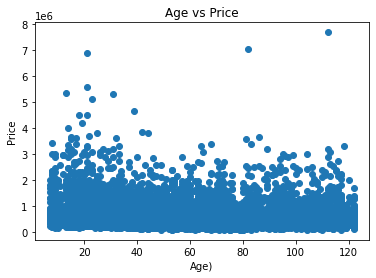

In [35]:
plt.scatter(df['age'], df['price'])
plt.title("Age vs Price")
plt.xlabel("Age)")
plt.ylabel("Price")
plt.show()

In [36]:
#lets categories the age into 3 categories: Young home, moderate home and old home according to its age. 

def house_age(df):
    if df['age']<=20:
        return 'young home'
    elif df['age'] > 60:
        return 'old home'
    else:
        return 'moderate home'

In [37]:
df4=df

In [38]:
df4['house_age']=df4.apply(house_age,axis=1)

In [46]:
df4.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,waterfronty,basement,renovated,age,house_age
0,7129300520,10/13/2014,"221,900.0",3,1.0,1180,5650,1.0,0.0,0.0,...,98178,47.5,-122.3,1340,5650,NO,NO,NO,67,old home
1,6414100192,12/9/2014,"538,000.0",3,2.2,2570,7242,2.0,0.0,0.0,...,98125,47.7,-122.3,1690,7639,NO,YES,YES,71,old home


Dropping columns: dropping unnecessary columns which we arent going to use for the data. 

In [47]:
#dropping unneccesary columns
df5 = df4.drop(['id','date','waterfront','yr_renovated','zipcode','lat','long','age','view'], axis = 1)

In [51]:
df5.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,"21,597.0","21,597.0","21,597.0","21,597.0","21,597.0","21,597.0","21,597.0","21,597.0","21,597.0","21,597.0"
mean,"540,296.6",3.4,2.1,"2,080.3","15,099.4",1.5,"1,788.6",291.7,"1,986.6","12,758.3"
std,"367,368.1",0.9,0.8,918.1,"41,412.6",0.5,827.8,442.7,685.2,"27,274.4"
min,"78,000.0",1.0,0.5,370.0,520.0,1.0,370.0,0.0,399.0,651.0
25%,"322,000.0",3.0,1.8,"1,430.0","5,040.0",1.0,"1,190.0",0.0,"1,490.0","5,100.0"
50%,"450,000.0",3.0,2.2,"1,910.0","7,618.0",1.5,"1,560.0",0.0,"1,840.0","7,620.0"
75%,"645,000.0",4.0,2.5,"2,550.0","10,685.0",2.0,"2,210.0",560.0,"2,360.0","10,083.0"
max,"7,700,000.0",33.0,8.0,"13,540.0","1,651,359.0",3.5,"9,410.0","4,820.0","6,210.0","871,200.0"


Outliers can represent accurate or inaccurate data. It's important to deal with outliers because they can skew interpretations of data. Outliers are common, especially for large data sets. Nevertheless, in the context of a larger dataset, it's essential to identify deal with outliers to ensure that the interpretation of the King County dataset is as accurate as possible as we move deeper into the process.Bedrooms show a really strong outlier from the describe dataset. 

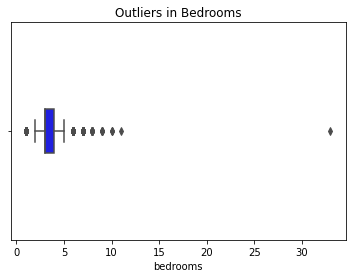

In [52]:
# Find outliers in bedrooms
sns.boxplot(x=df5['bedrooms'], fliersize=5, color='b', width=.2, whis=1.5)
plt.title('Outliers in Bedrooms')
plt.show()

Noticing the data points that lie substantially far away from the box and wisker plot, these are considered the outliers that can skew the data in considerable ways. These outliers can be dealt with by using the z-score formula to rid these specific columns of extreme outliers, in this case, data points that lie 7 standard deviations above the mean.

In [55]:
# Import stats from scipy
from scipy import stats

# Identify the outliers 7 standard deviations away from mean in all columns
def remove_outliers(df5, column_name, threshold=7):
    z_scores = stats.zscore(df5[column_name])
    indices = np.abs(np.where(z_scores > threshold))
    return indices[0]
    
columns_to_check = ['bedrooms']

all_indices = []
for column in columns_to_check:
    indices = remove_outliers(df5, column, threshold=4)
    all_indices.extend(indices)
all_indices = np.unique(all_indices)

In [56]:
# Remove outliers 7 standard deviations from mean in all columns
df6 = df5.drop(index=all_indices)
df6.shape

(21573, 16)

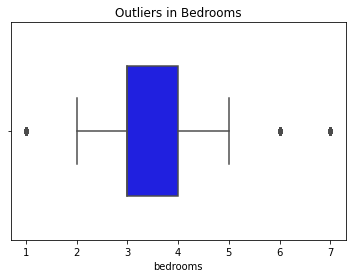

In [57]:
# Check the outlier in bedrooms now
sns.boxplot(x=df6['bedrooms'], fliersize=5, color='b', width=0.6)
plt.title('Outliers in Bedrooms')
plt.show()

The dataset has been reduced by 24 values (0.1% of the data) to remove outliers in Bedrooms that stood 7 deviations from the mean. The following .drop( ) method removes those values from the King County dataframe. You can tell the difference between the data points in the BLUE box plot. As of now, the data cleaning process is almost finished. The only tasks left in the process are to check for multicollinearity, normalize specific values and possibly execute feature engineering if necessary.

Assessing Multicollinearity Judging from the information above, there does not seem to be any more placeholder null values, so we can proceed with identifying multicollinearity

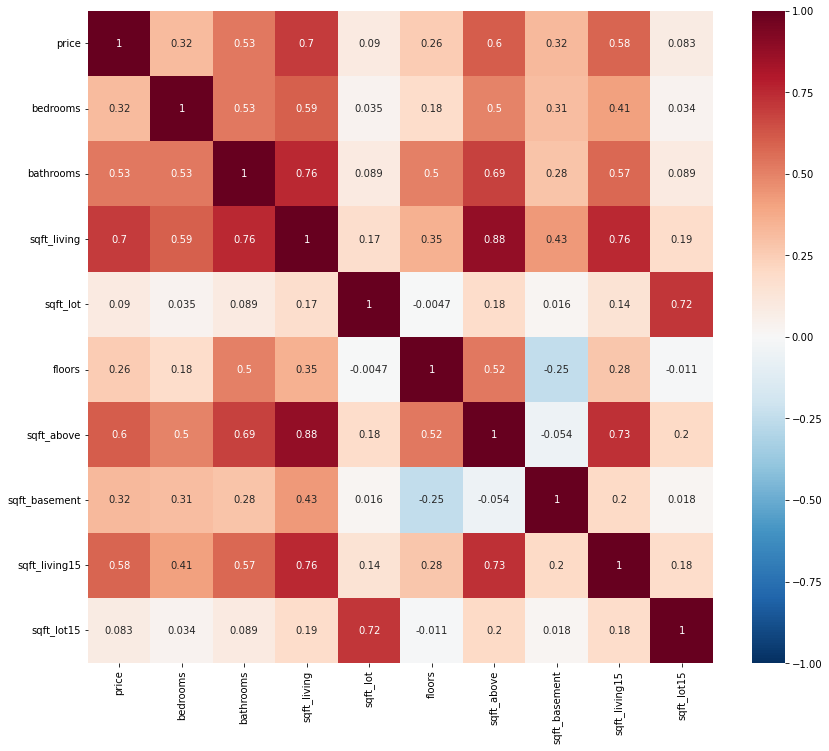

In [58]:
# Plot a heatmap that identifies correlations of predictors
correlation = df6.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [59]:
# View correlation matrix
df6.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15
price,1.0,0.3,0.5,0.7,0.1,0.3,0.6,0.3,0.6,0.1
bedrooms,0.3,1.0,0.5,0.6,0.0,0.2,0.5,0.3,0.4,0.0
bathrooms,0.5,0.5,1.0,0.8,0.1,0.5,0.7,0.3,0.6,0.1
sqft_living,0.7,0.6,0.8,1.0,0.2,0.4,0.9,0.4,0.8,0.2
sqft_lot,0.1,0.0,0.1,0.2,1.0,-0.0,0.2,0.0,0.1,0.7
floors,0.3,0.2,0.5,0.4,-0.0,1.0,0.5,-0.2,0.3,-0.0
sqft_above,0.6,0.5,0.7,0.9,0.2,0.5,1.0,-0.1,0.7,0.2
sqft_basement,0.3,0.3,0.3,0.4,0.0,-0.2,-0.1,1.0,0.2,0.0
sqft_living15,0.6,0.4,0.6,0.8,0.1,0.3,0.7,0.2,1.0,0.2
sqft_lot15,0.1,0.0,0.1,0.2,0.7,-0.0,0.2,0.0,0.2,1.0


In [60]:
# Return "True" for positive or negative correlations that are bigger than 0.75.
abs(df6.corr())>0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,True,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False
sqft_above,False,False,False,True,False,False,True,False,False,False
sqft_basement,False,False,False,False,False,False,False,True,False,False
sqft_living15,False,False,False,True,False,False,False,False,True,False
sqft_lot15,False,False,False,False,False,False,False,False,False,True


In [61]:
#an organized series showing the correlations to price
datacorrp = df6[['price', 'sqft_above', 'sqft_living15', 'bathrooms', 'sqft_living','bedrooms','sqft_lot','floors','sqft_basement','sqft_lot15']]
datacorr = datacorrp.corr().sort_values('price',ascending=False)['price']
datacorr = datacorr.drop(index=['price'])
datacorr

sqft_living     0.7
sqft_above      0.6
sqft_living15   0.6
bathrooms       0.5
sqft_basement   0.3
bedrooms        0.3
floors          0.3
sqft_lot        0.1
sqft_lot15      0.1
Name: price, dtype: float64

In [62]:
# analyzing the high correlated pairs
datafeat = df6.drop(columns=['price'])
dtfc = datafeat.corr().abs().stack().reset_index().sort_values(0, ascending=False)

dtfc['col_pairs'] = list(zip(dtfc.level_0,dtfc.level_1))
dtfc['same'] = dtfc['col_pairs'].map(lambda x: (x[0] in x[1]) or (x[1] in x[0]))
dtfc['col_pairs'] = dtfc['col_pairs'].map(lambda x:sorted(list(x)))
dtfc.set_index(['col_pairs'],inplace=True)
dtfc = dtfc[dtfc['same'] == False]
dtfc.drop(columns=['level_0','level_1','same'],inplace=True)
dtfc.columns = ['C']
dtfc.drop_duplicates(inplace=True)
dtfc.head(20)

,C
col_pairs,
"[sqft_above, sqft_living]",0.9
"[bathrooms, sqft_living]",0.8
"[sqft_above, sqft_living15]",0.7
"[bathrooms, sqft_above]",0.7
"[bedrooms, sqft_living]",0.6
"[bathrooms, sqft_living15]",0.6
"[bathrooms, bedrooms]",0.5
"[floors, sqft_above]",0.5
"[bathrooms, floors]",0.5


As sqft living , sqft living 15, sqft above are closely related, dropping sqft living 15 as this has less significance with price. During this step, one of the biggest predictors that most people would suggest directly explains variances in housing prices was removed from the dataset. This was achieved because our sqft_living15 predictor directly correlates with the many other features within the dataset. 

In [64]:
df7 = df6.drop(["sqft_living15"],axis=1)

# One-Hot Encoding the categorical data
Here we are using One Hot encoding and Get dummies to our categorical featsures (Condition,Grade, basement, waterfronty,renovated, age) into individaul columns using SkLearn's Onehotencoding function and Get Dummies function. I will then drop the first column to avoid multicollinearity issues.

In [66]:
from sklearn.preprocessing import OneHotEncoder
cond = df7[["condition"]]
ohe = OneHotEncoder(categories="auto", handle_unknown="error", sparse=False)
ohe.fit(cond)
cond_encod = ohe.transform(cond)
cond_encod = pd.DataFrame(
    # Pass in NumPy array
    cond_encod,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index= df6.index
)
cond_encod.drop(columns='3 and above', inplace=True)

In [67]:
grade = df7[["grade"]]
ohe = OneHotEncoder(categories="auto",handle_unknown="ignore", sparse=False)
ohe.fit(grade)
grade_encod = ohe.transform(grade)
grade_encod = pd.DataFrame(
    # Pass in NumPy array
    grade_encod,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index= df6.index
)
grade_encod.drop(columns='Low Grade', inplace=True)

In [68]:
reno_dummies = pd.get_dummies(df6['renovated'], prefix='reno', drop_first=True)
bsmt_dummies = pd.get_dummies(df6['basement'], prefix='bsmt', drop_first=True)
wtr_dummies = pd.get_dummies(df6['waterfronty'], prefix='waterfront', drop_first=True)
age_dummies = pd.get_dummies(df6['house_age'], prefix='age', drop_first=True)

In [69]:
df8 = pd.concat([df7,cond_encod, grade_encod, reno_dummies,bsmt_dummies,wtr_dummies,age_dummies], axis=1)\
        .drop(columns=['condition','grade','waterfronty','basement','renovated','house_age'])


In [71]:
df8.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_lot15,Below 3,Above Average Grade,Average Grade,Excellent Grade,reno_YES,bsmt_YES,waterfront_YES,age_old home,age_young home
0,"221,900.0",3,1.0,1180,5650,1.0,1180,0.0,5650,0.0,0.0,1.0,0.0,0,0,0,1,0
1,"538,000.0",3,2.2,2570,7242,2.0,2170,400.0,7639,0.0,0.0,1.0,0.0,1,1,0,1,0


# Basement vs Housing Prices
For the purpose of even futher understanding the dataset, it's meaningful to be curious. Asking questions is the first place to start. In this instance, I would like to find out if basements in King County will have any impact on the housing prices.

Creating a violin plot to analyze different criterias vs. housing price

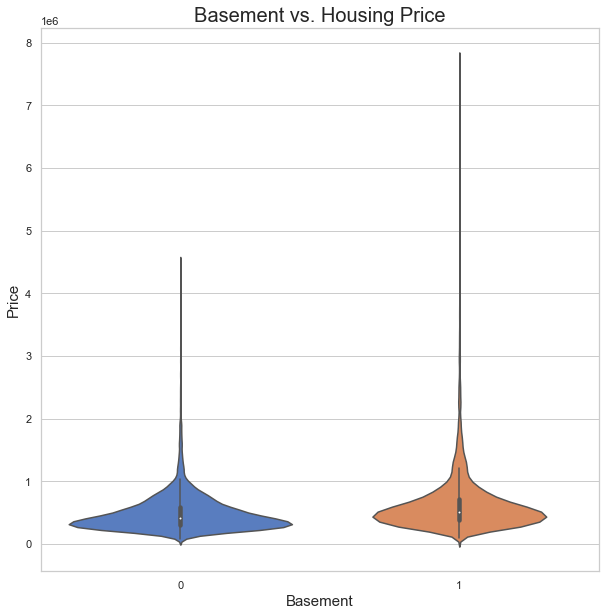

In [72]:

plt.figure(figsize=(10,10))
sns.set(style="whitegrid", palette="muted", color_codes=True)
sns.violinplot(x = 'bsmt_YES', y = 'price', data=df8)
plt.title('Basement vs. Housing Price', fontsize=20)
plt.xlabel('Basement', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

Interpretation: Violin plots identify probablity density of our data. The middle line is a kernel density estimation to show the distribution shape of the data. The wider sections of the violin plot represent a higher probability that datapoints will conform to that value, and more skinny portions represent a lower probability. The white dot in the middle represents the mean. In these results about housing prices relating to the inclusion of a basement, the prediction yields to be True. It's clear to tell the mean housing price is HIGHER when a basement is included in the property. It also appears that housing prices in the upper quartiles are more expensive when a basement is included.

# Renovation vs. Price

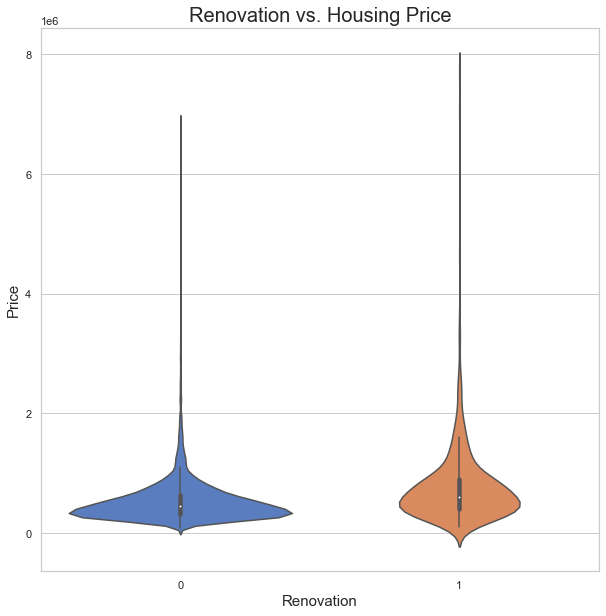

In [73]:

plt.figure(figsize=(10,10))
sns.set(style="whitegrid", palette="muted", color_codes=True)
sns.violinplot(x = 'reno_YES', y = 'price', data=df8)
plt.title('Renovation vs. Housing Price', fontsize=20)
plt.xlabel('Renovation', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

It's clear to tell the mean housing price is HIGHER when a house is renovated compared to a property not renovated. It also appears that housing prices in the upper quartiles are more expensive for a renovated property.

# Waterfront vs. Price

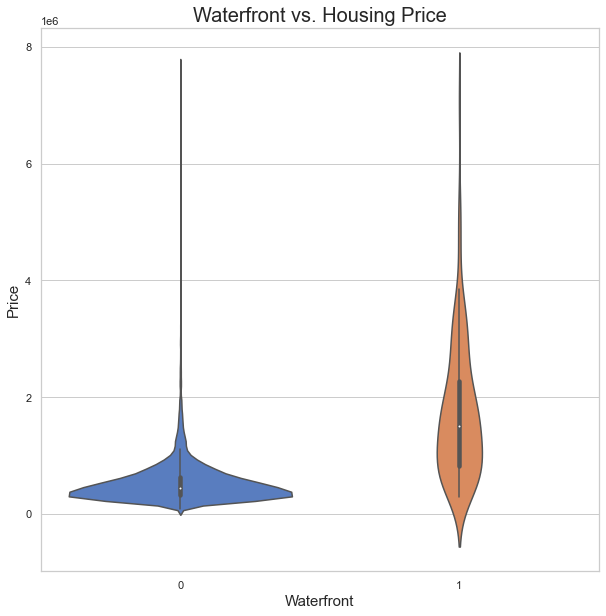

In [74]:

plt.figure(figsize=(10,10))
sns.set(style="whitegrid", palette="muted", color_codes=True)
sns.violinplot(x = 'waterfront_YES', y = 'price', data=df8)
plt.title('Waterfront vs. Housing Price', fontsize=20)
plt.xlabel('Waterfront', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

It's clear to tell the mean housing price is HIGHER when a house is property sitting on waterfront with high housing prices in the upper quartiles.

# Age of the house vs Price

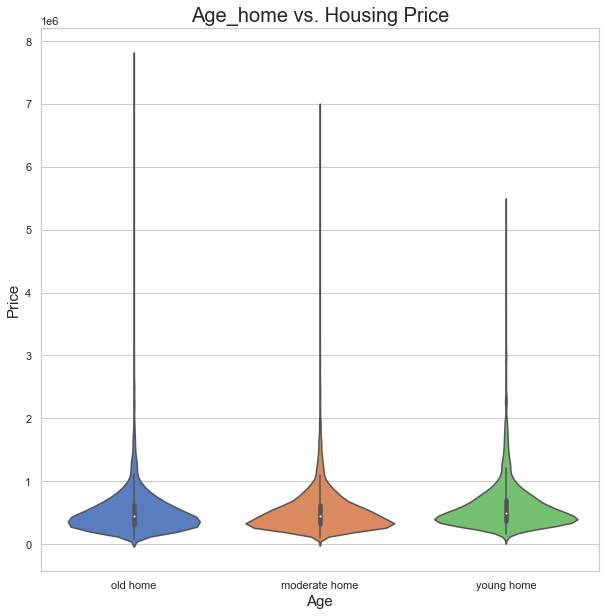

In [76]:

plt.figure(figsize=(10,10))
sns.set(style="whitegrid", palette="muted", color_codes=True)
sns.violinplot(x = 'house_age', y = 'price', data=df7)
plt.title('Age_home vs. Housing Price', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

There is not much difference in the mean housing prices as per the house age. 

# Grade vs Price

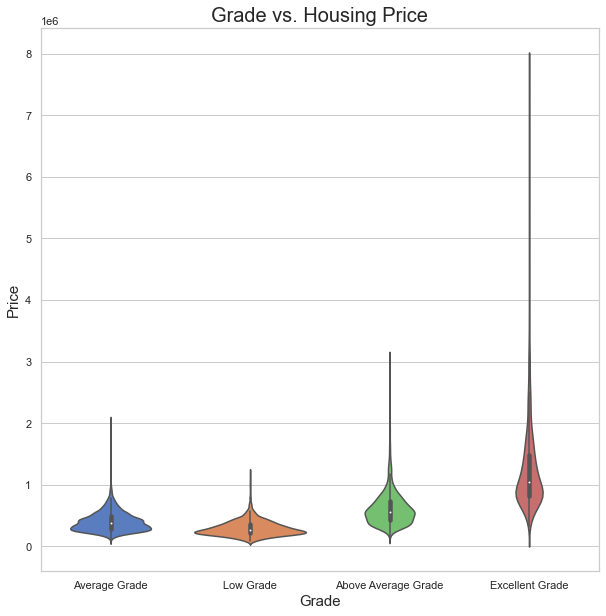

In [77]:

plt.figure(figsize=(10,10))
sns.set(style="whitegrid", palette="muted", color_codes=True)
sns.violinplot(x = 'grade', y = 'price', data=df7)
plt.title('Grade vs. Housing Price', fontsize=20)
plt.xlabel('Grade', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

We can certaininly see higher mean prices of the properties as per their Grade. Properties with Excellent grade have the highest mean price.

# Condition vs. Housing Price


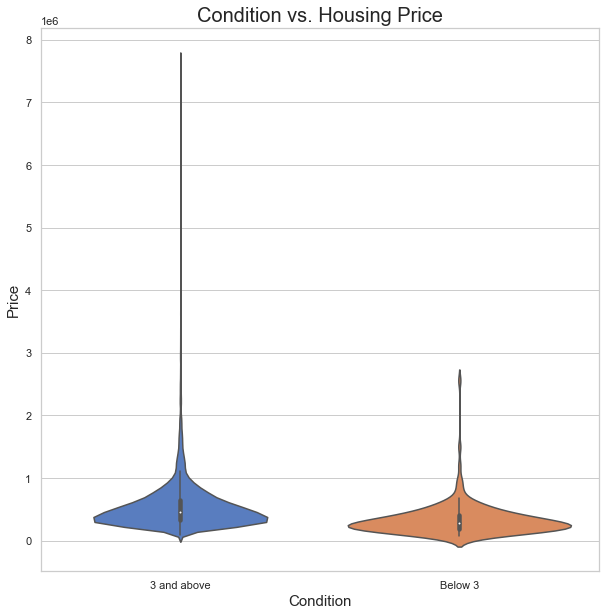

In [79]:

plt.figure(figsize=(10,10))
sns.set(style="whitegrid", palette="muted", color_codes=True)
sns.violinplot(x = 'condition', y = 'price', data=df7)
plt.title('Condition vs. Housing Price', fontsize=20)
plt.xlabel('Condition', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

Better condition houses with 3 and above condition have high mean price compared to 1 and 2.

 # Baseline model- Linear Regression - Model 1
 
 Lets create our First Model with out dateset.



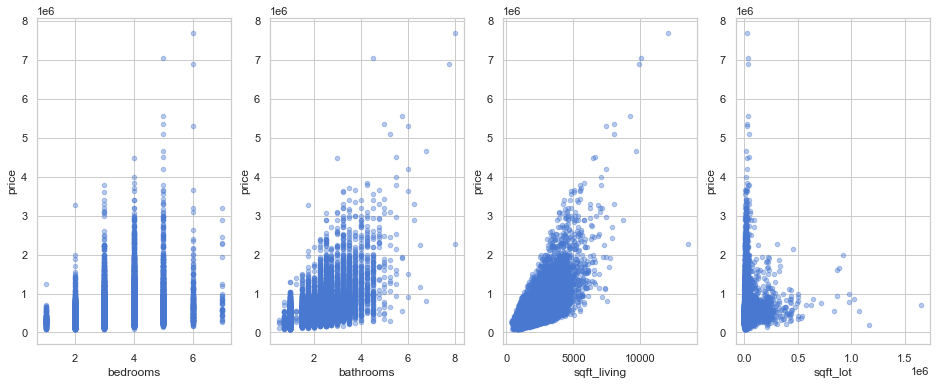

In [80]:
# Lets look at the Scatterplots to assess the features. 
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,6))
for xcol, ax in zip(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'], axes):
    df8.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

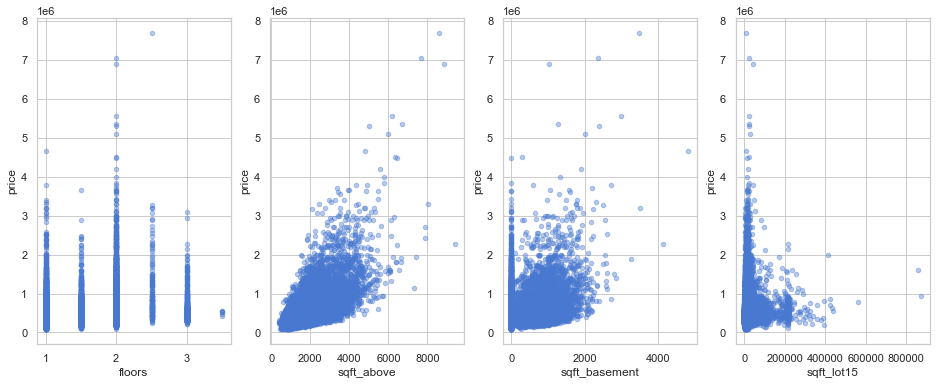

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16,6))
for xcol, ax in zip(['floors', 'sqft_above',
                     'sqft_basement', 'sqft_lot15'], ax):
    df8.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

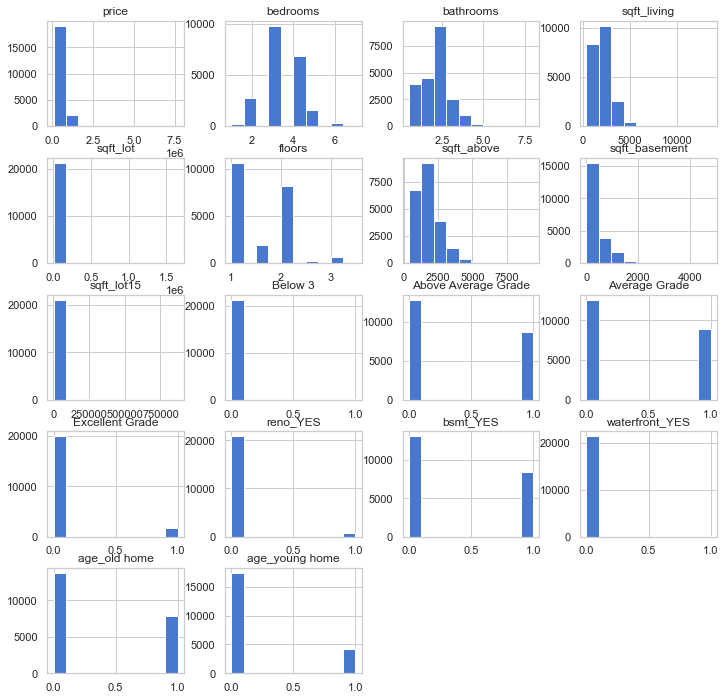

In [83]:
# Lets visualise the data with histograms

import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (12,12))
ax = fig.gca()
df8.hist(ax = ax);

In [84]:
X = df8.drop('price', axis=1)
y = df8['price']

X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     2236.
Date:                Tue, 18 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:50:49   Log-Likelihood:            -2.9645e+05
No. Observations:               21573   AIC:                         5.929e+05
Df Residuals:                   21556   BIC:                         5.931e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -5.891e+04   9042.334     -6.515      0.000   -7.66e+04   -4.12e+04
bedrooms            -4.107e+04   2266.955    -18.118      0.000   -4.55e+04   -3.66e+04
bathrooms            4.046e+04   3666.219     11.036      0.000    3.33e+04    4.76e+04
sqft_living           139.7789      2.653     52.686      0.000     134.579     144.979
sqft_lot               -0.0207      0.053     -0.387      0.699      -0.125       0.084
floors               1.692e+04   4109.638      4.117      0.000    8865.398     2.5e+04
sqft_above             67.8800      3.200     21.211      0.000      61.607      74.153
sqft_basement          71.8988      4.580     15.697      0.000      62.921      80.877
sqft_lot15             -0.4844      0.082     -5.934      0.000      -0.644      -0.324
Below 3             -3.942e+04   1.62e+04     -2.437      0.015   -7.11e+04   -7713.351
Above Average Grade  1.566e+05   6746.426     23.207      0.000    1.43e+05     1.7e+05
Average Grade        6.338e+04   5711.503     11.096      0.000    5.22e+04    7.46e+04
Excellent Grade      4.789e+05   1.05e+04     45.652      0.000    4.58e+05    4.99e+05
reno_YES             5.953e+04   8698.351      6.844      0.000    4.25e+04    7.66e+04
bsmt_YES             2.169e+04   5851.300      3.706      0.000    1.02e+04    3.32e+04
waterfront_YES       7.428e+05    1.9e+04     39.191      0.000    7.06e+05     7.8e+05
age_old home         1.726e+05   4034.455     42.783      0.000    1.65e+05    1.81e+05
age_young home      -1.837e+04   4730.575     -3.883      0.000   -2.76e+04   -9097.211
==============================================================================
Omnibus:                    15009.001   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           871365.312
Skew:                           2.726   Prob(JB):                         0.00
Kurtosis:                      33.654   Cond. No.                     1.38e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.89e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

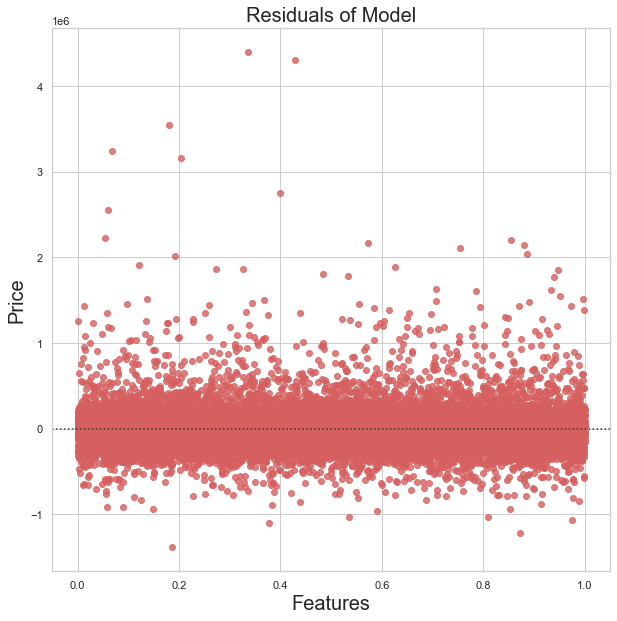

In [85]:
 # Check residuals using sns.residplot
y_hat = model.predict()
residuals = df8['price'] - y_hat
x_vals = np.linspace(0, 1, len(residuals))

plt.figure(figsize=(10,10))
sns.residplot(x_vals, residuals, data = df8, color='r')
plt.title('Residuals of Model', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
plt.show()

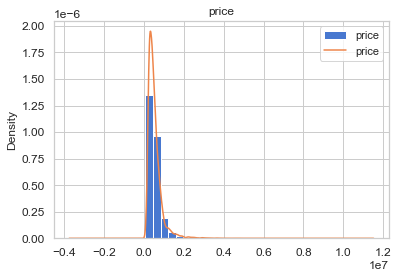

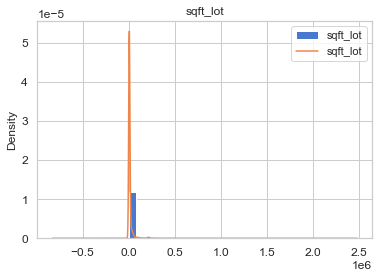

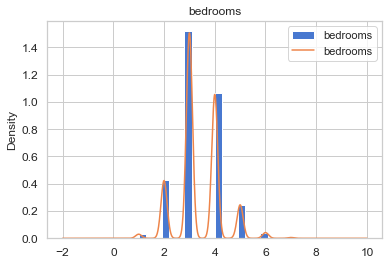

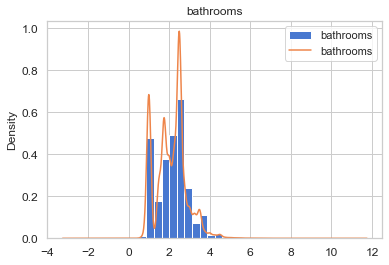

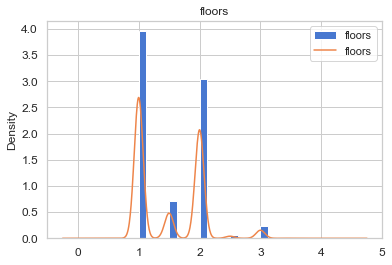

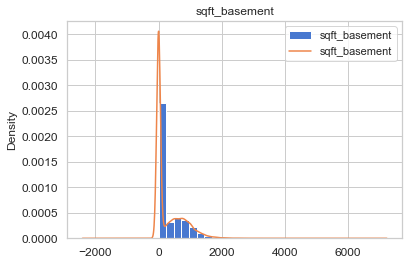

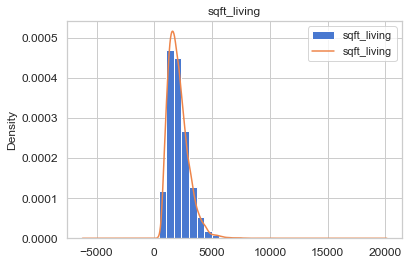

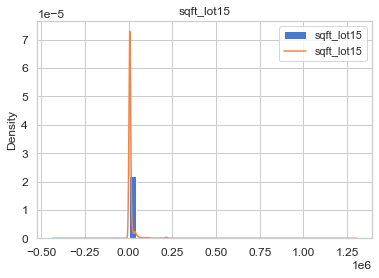

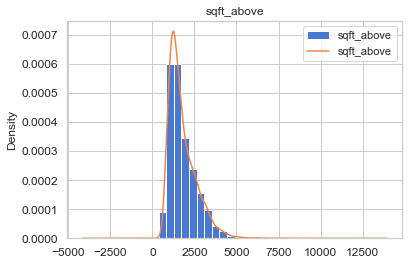

In [86]:
# Plot a KDE for columns in dataset
for column in ['price', 'sqft_lot', 'bedrooms', 'bathrooms', 'floors',  
                   'sqft_basement','sqft_living', 'sqft_lot15','sqft_above']:
    df8[column].plot.hist(density = True, bins = 20)
    df8[column].plot.kde(label = column)
    plt.title(column)
    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


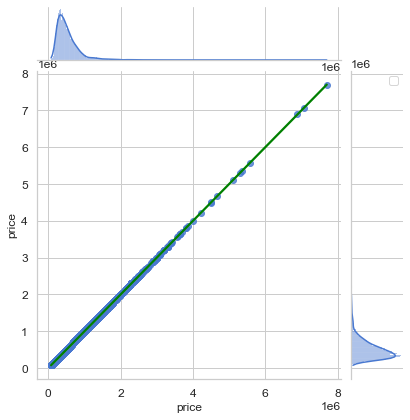

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


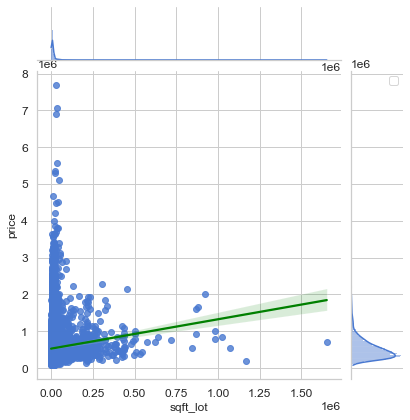

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


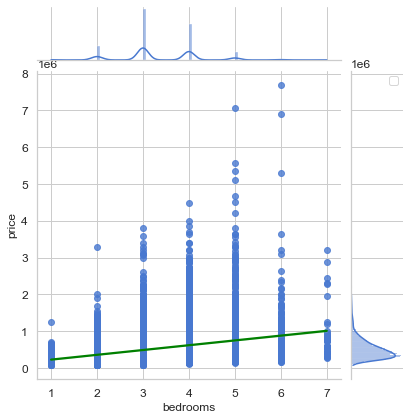

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


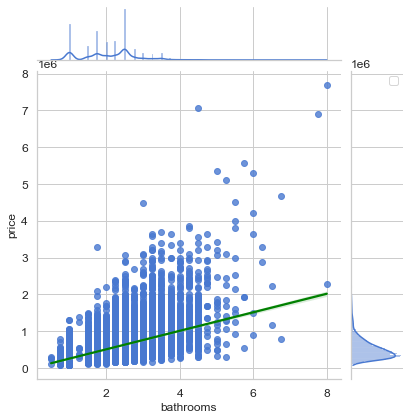

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


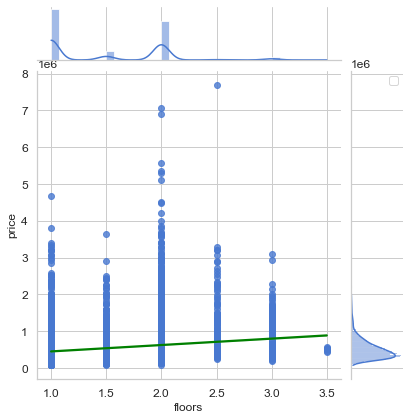

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


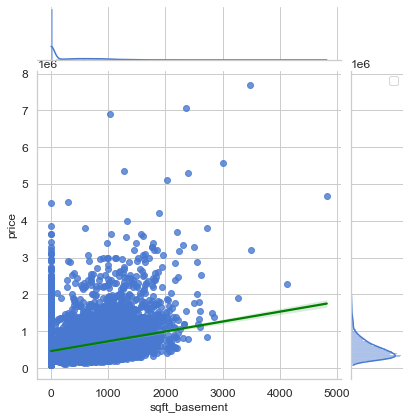

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


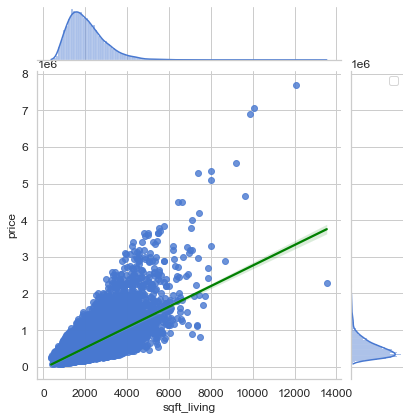

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


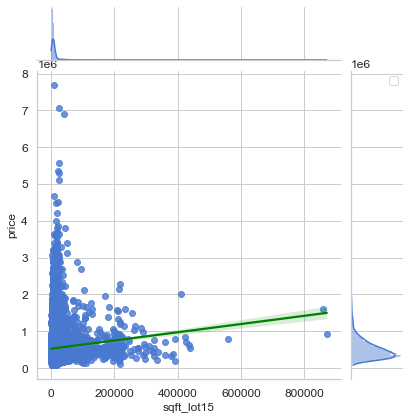

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


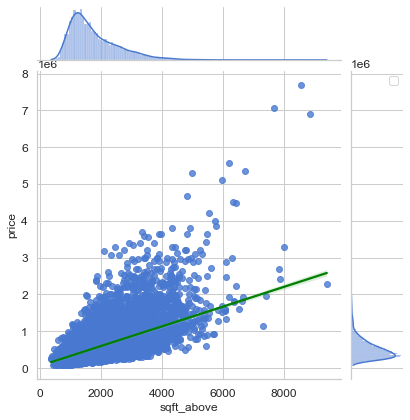

In [87]:
## Creating Jointplots of the dataset

import warnings
warnings.filterwarnings('ignore')

for column in ['price', 'sqft_lot', 'bedrooms', 'bathrooms', 'floors',  
                   'sqft_basement','sqft_living', 'sqft_lot15','sqft_above']:
    sns.jointplot(x = column, y ='price',
                  data = df8, 
                  kind = 'reg', 
                  label = column,
                  joint_kws = {'line_kws':{'color':'green'}})
    plt.legend()
    plt.show()

Interpretation:

Model Results:
R-Squared = 0.624 → Total square footage predicts 62.4% of the variance for price.
F-Statistic = 2236 → Cannot confirm total square footage is signficant.

Features:
P-Value = 0 → Total square footage predicting price isn't random.
P Value for sqftlot is 0.0699 which is not statitically significant. 

Residuals:
Skewness = 2.726 → Residuals are positively skewed.
Kurtosis = 33.654 → Residuals do not fall within 3 standard deviations of mean.
Jarque-Bera = 871365.312 → Data is not normal.
 
Joint plots:

Most of the data has some moderate correlation with the price
Strong correlation with sqft_living & sqft_above & latitude
Bedrooms, Bathrooms and floors seem to be multimodal as the data is discrete

There is a need to normalise the data with this model. Lets perform Log transformation and normalize our data for our next model. 




# Log transformation

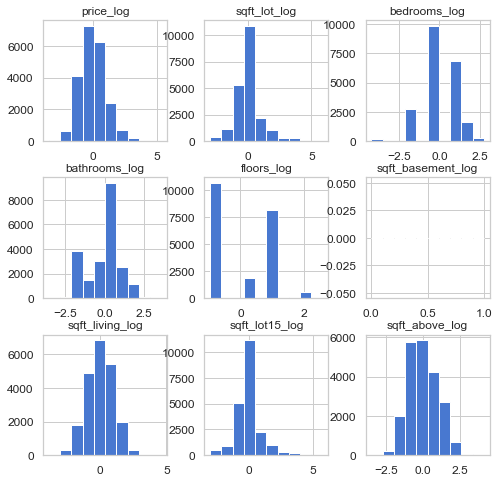

In [88]:
# Lets do the Log transformation and normalize our data and then relook at the model. 

continuous = ['price', 'sqft_lot', 'bedrooms', 'bathrooms', 'floors',  
                   'sqft_basement','sqft_living', 'sqft_lot15','sqft_above']

df8_cont=df8[continuous]

# log features
log_names = [f'{column}_log' for column in df8_cont.columns]

df8_log = np.log(df8_cont)
df8_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df8_log_norm = df8_log.apply(normalize)
df8_log_norm.hist(figsize  = [8, 8]);

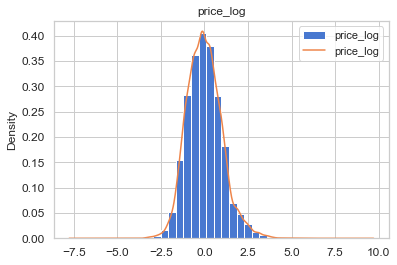

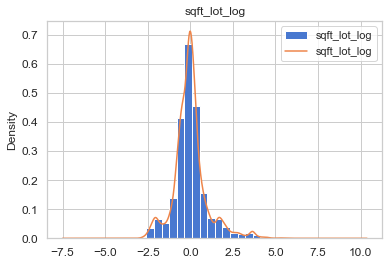

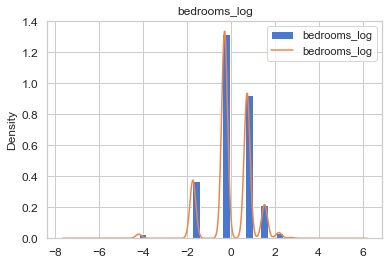

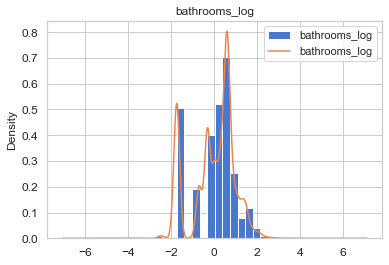

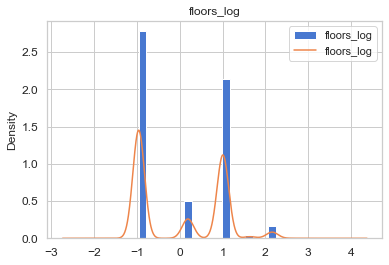

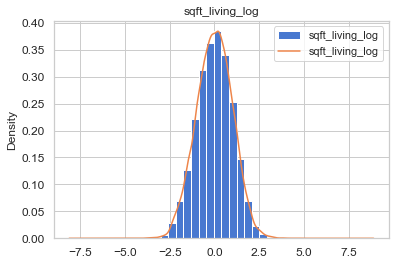

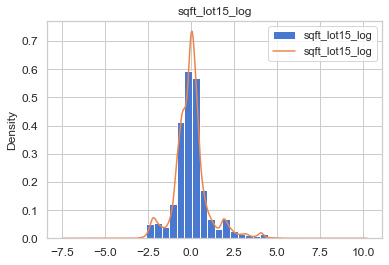

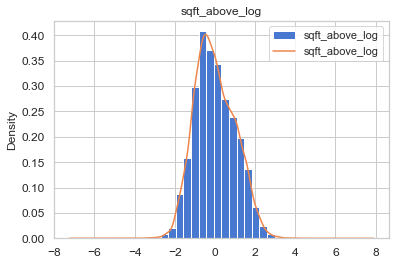

In [89]:
# Lets check again the distribution of the normalised data. 
#Plot a KDE for columns in dataset
for column in ['price_log', 'sqft_lot_log', 'bedrooms_log', 'bathrooms_log', 'floors_log',  
                   'sqft_living_log', 'sqft_lot15_log','sqft_above_log']:
    df8_log_norm[column].plot.hist(density = True, bins = 20)
    df8_log_norm[column].plot.kde(label = column)
    plt.title(column)
    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


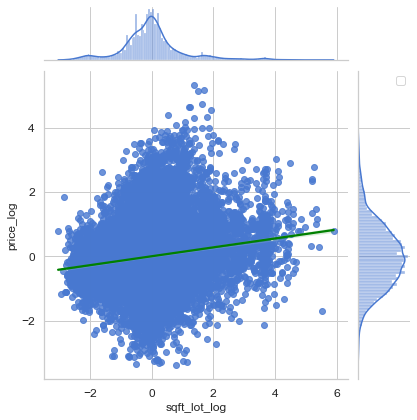

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


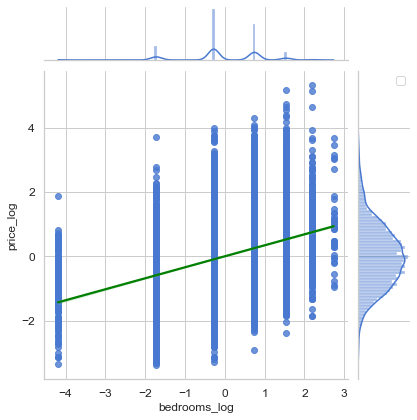

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


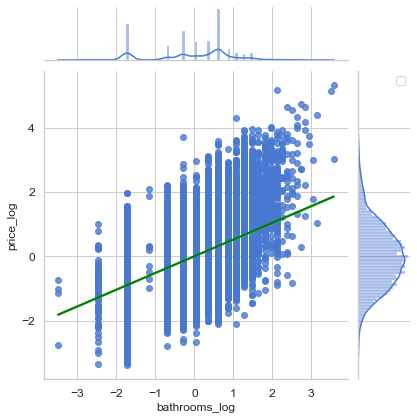

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


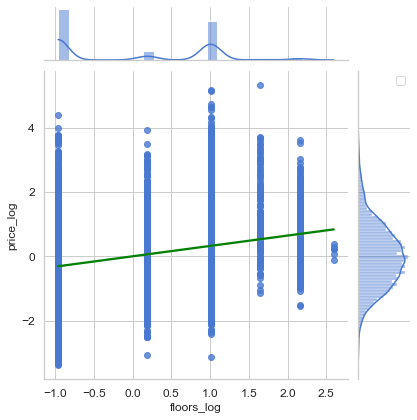

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


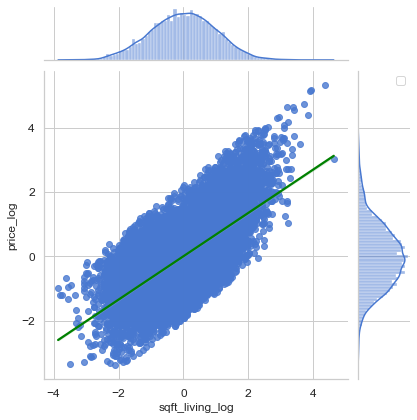

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


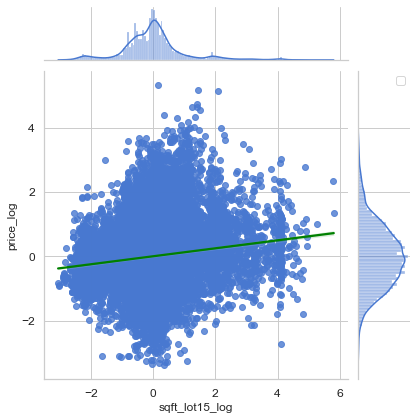

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


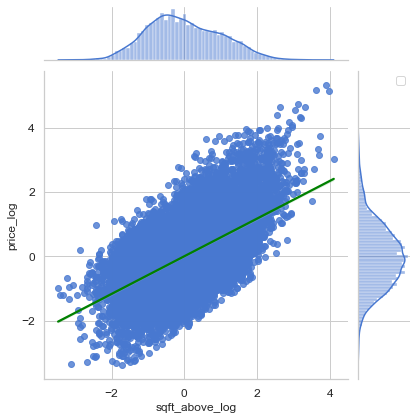

In [91]:
#Joint Plots with normalised data
import warnings
warnings.filterwarnings('ignore')

for column in ['sqft_lot_log', 'bedrooms_log', 'bathrooms_log', 'floors_log',  
                   'sqft_living_log', 'sqft_lot15_log','sqft_above_log']:
    sns.jointplot(x = column, y ='price_log',
                  data = df8_log_norm, 
                  kind = 'reg', 
                  label = column,
                  joint_kws = {'line_kws':{'color':'green'}})
    plt.legend()
    plt.show()

# Conduct min-max scaling

In [93]:
#conduct min-max scaling
for i in df8_log_norm.columns:
    if i == 'price_log':
        pass
    else:
        df8_log_norm[i] = (df8_log_norm[i] - df8_log_norm[i].min())/(df8_log_norm[i].max() - df8_log_norm[i].min())

 # Multiple Linear Regression: Model 2

In [94]:
data = pd.concat([df8_log_norm, df8], axis=1)\
        .drop(columns=['price','bedrooms','bathrooms','sqft_living','sqft_lot','sqft_lot15','sqft_above','sqft_basement_log','floors'])

In [97]:
data.head(1)

,price_log,sqft_lot_log,bedrooms_log,bathrooms_log,floors_log,sqft_living_log,sqft_lot15_log,sqft_above_log,sqft_basement,Below 3,Above Average Grade,Average Grade,Excellent Grade,reno_YES,bsmt_YES,waterfront_YES,age_old home,age_young home
0,-1.4,0.3,0.6,0.3,0.0,0.3,0.3,0.4,0.0,0.0,0.0,1.0,0.0,0,0,0,1,0


In [98]:
X = data.drop('price_log', axis=1)
y = data['price_log']
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     2027.
Date:                Tue, 18 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:10:00   Log-Likelihood:                -20308.
No. Observations:               21573   AIC:                         4.065e+04
Df Residuals:                   21555   BIC:                         4.080e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.3374      0.030    -78.386      0.000      -2.396      -2.279
sqft_lot_log           -0.2667      0.099     -2.681      0.007      -0.462      -0.072
bedrooms_log           -0.5742      0.040    -14.332      0.000      -0.653      -0.496
bathrooms_log           0.3943      0.055      7.174      0.000       0.287       0.502
floors_log              0.1234      0.024      5.183      0.000       0.077       0.170
sqft_living_log         0.8538      0.237      3.606      0.000       0.390       1.318
sqft_lot15_log         -0.1975      0.096     -2.062      0.039      -0.385      -0.010
sqft_above_log          2.6301      0.198     13.306      0.000       2.243       3.018
sqft_basement           0.0003   2.76e-05     10.555      0.000       0.000       0.000
Below 3                -0.3305      0.045     -7.391      0.000      -0.418      -0.243
Above Average Grade     0.8904      0.020     45.142      0.000       0.852       0.929
Average Grade           0.4047      0.016     24.785      0.000       0.373       0.437
Excellent Grade         1.6780      0.029     58.794      0.000       1.622       1.734
reno_YES                0.0977      0.024      4.068      0.000       0.051       0.145
bsmt_YES                0.2173      0.018     11.828      0.000       0.181       0.253
waterfront_YES          1.0499      0.052     20.025      0.000       0.947       1.153
age_old home            0.5571      0.011     48.520      0.000       0.535       0.580
age_young home         -0.0501      0.014     -3.680      0.000      -0.077      -0.023
==============================================================================
Omnibus:                       21.324   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.175
Skew:                          -0.042   Prob(JB):                     9.28e-06
Kurtosis:                       3.137   Cond. No.                     3.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpretation:

Model Results:
R-Squared = 0.615 → Selected features predicts 61.5% of the variance for price.
F-Statistic = 2027. → Cannot confirm features are signficant.

Features: 
P-Values = 0.000 → Features predicting price isn't random.
Coefficient = -2.3374 - There is overall  negative relationship with price. 

Residuals:
Skewness = -0.042 → Residuals are negatively skewed.
Kurtosis = 3.137→ Residuals do not fall within 3 standard deviations of mean.


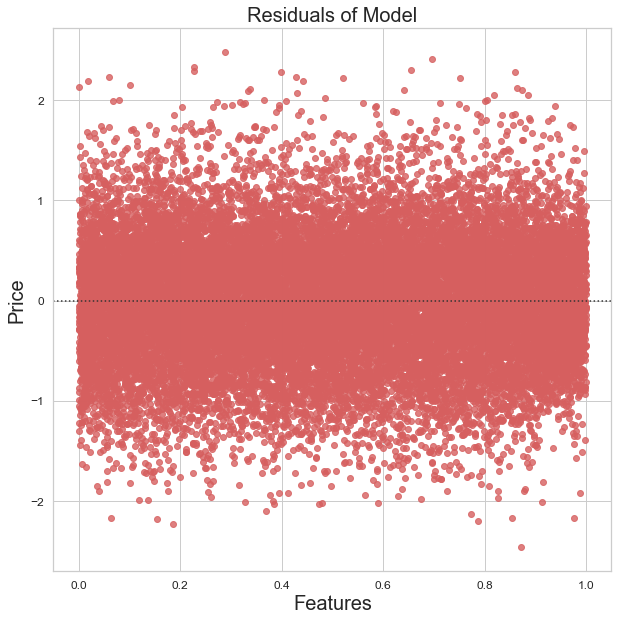

In [99]:
# Check residuals using sns.residplot
y_hat = model.predict()
residuals = data['price_log'] - y_hat
x_vals = np.linspace(0, 1, len(residuals))

plt.figure(figsize=(10,10))
sns.residplot(x_vals, residuals, data = data, color='r')
plt.title('Residuals of Model', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
plt.show()

This iteration of a multiple linear regression model finds that the selected features predict 61% of the variance of our target price. The resulting F-statistic doesn't prove that the use of the features will predict the target with total accuracy. The P-value indicates that all relationships aren't random and most feature coefficients reveal negative correlation. The data, given by our results, implies skewness and much of the data doen't fall within 3 standard deviations from the mean. Further we also have a strong multicollinearity which needs to be addressed. 

# Multiple Linear Regression: Model 3

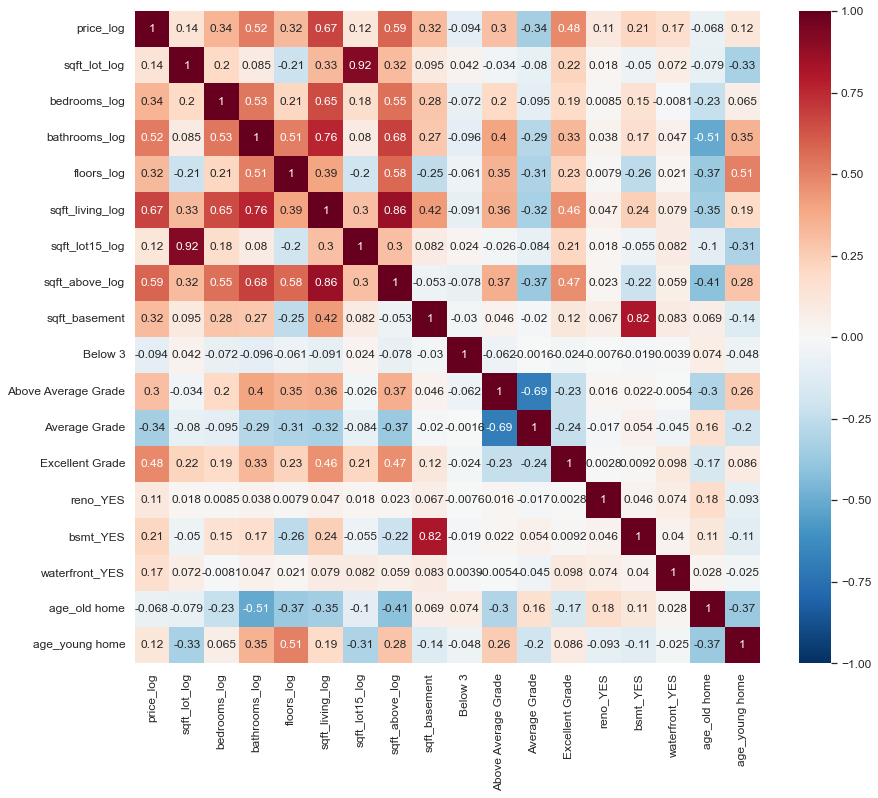

In [100]:
# Lets address the multicollinearity issue. 

# Plot a heatmap that identifies correlations of predictors
correlation = data.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [101]:
data.corr()

,price_log,sqft_lot_log,bedrooms_log,bathrooms_log,floors_log,sqft_living_log,sqft_lot15_log,sqft_above_log,sqft_basement,Below 3,Above Average Grade,Average Grade,Excellent Grade,reno_YES,bsmt_YES,waterfront_YES,age_old home,age_young home
price_log,1.0,0.1,0.3,0.5,0.3,0.7,0.1,0.6,0.3,-0.1,0.3,-0.3,0.5,0.1,0.2,0.2,-0.1,0.1
sqft_lot_log,0.1,1.0,0.2,0.1,-0.2,0.3,0.9,0.3,0.1,0.0,-0.0,-0.1,0.2,0.0,-0.0,0.1,-0.1,-0.3
bedrooms_log,0.3,0.2,1.0,0.5,0.2,0.6,0.2,0.5,0.3,-0.1,0.2,-0.1,0.2,0.0,0.2,-0.0,-0.2,0.1
bathrooms_log,0.5,0.1,0.5,1.0,0.5,0.8,0.1,0.7,0.3,-0.1,0.4,-0.3,0.3,0.0,0.2,0.0,-0.5,0.3
floors_log,0.3,-0.2,0.2,0.5,1.0,0.4,-0.2,0.6,-0.3,-0.1,0.3,-0.3,0.2,0.0,-0.3,0.0,-0.4,0.5
sqft_living_log,0.7,0.3,0.6,0.8,0.4,1.0,0.3,0.9,0.4,-0.1,0.4,-0.3,0.5,0.0,0.2,0.1,-0.3,0.2
sqft_lot15_log,0.1,0.9,0.2,0.1,-0.2,0.3,1.0,0.3,0.1,0.0,-0.0,-0.1,0.2,0.0,-0.1,0.1,-0.1,-0.3
sqft_above_log,0.6,0.3,0.5,0.7,0.6,0.9,0.3,1.0,-0.1,-0.1,0.4,-0.4,0.5,0.0,-0.2,0.1,-0.4,0.3
sqft_basement,0.3,0.1,0.3,0.3,-0.3,0.4,0.1,-0.1,1.0,-0.0,0.0,-0.0,0.1,0.1,0.8,0.1,0.1,-0.1
Below 3,-0.1,0.0,-0.1,-0.1,-0.1,-0.1,0.0,-0.1,-0.0,1.0,-0.1,-0.0,-0.0,-0.0,-0.0,0.0,0.1,-0.0


In [102]:
#check to see which independant variables have corraletion greater than 0.8
abs(data.corr()) > 0.8

,price_log,sqft_lot_log,bedrooms_log,bathrooms_log,floors_log,sqft_living_log,sqft_lot15_log,sqft_above_log,sqft_basement,Below 3,Above Average Grade,Average Grade,Excellent Grade,reno_YES,bsmt_YES,waterfront_YES,age_old home,age_young home
price_log,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_lot_log,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
bedrooms_log,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms_log,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors_log,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living_log,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
sqft_lot15_log,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
sqft_above_log,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
Below 3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [103]:
#an organized series showing the correlations to price
datacorrp1 = data[['price_log', 'sqft_lot_log', 'sqft_lot15_log', 'sqft_above_log', 'bsmt_YES','sqft_basement','sqft_living_log']]
datacorr1 = datacorrp1.corr().sort_values('price_log',ascending=False)['price_log']
datacorr1 = datacorr1.drop(index=['price_log'])
datacorr1

sqft_living_log   0.7
sqft_above_log    0.6
sqft_basement     0.3
bsmt_YES          0.2
sqft_lot_log      0.1
sqft_lot15_log    0.1
Name: price_log, dtype: float64

In [104]:
# analyzing the high correlated pairs
datafeat1 = data.drop(columns=['price_log'])
dtfc1 = datafeat1.corr().abs().stack().reset_index().sort_values(0, ascending=False)

dtfc1['col_pairs'] = list(zip(dtfc1.level_0,dtfc1.level_1))
dtfc1['same'] = dtfc1['col_pairs'].map(lambda x: (x[0] in x[1]) or (x[1] in x[0]))
dtfc1['col_pairs'] = dtfc1['col_pairs'].map(lambda x:sorted(list(x)))
dtfc1.set_index(['col_pairs'],inplace=True)
dtfc1 = dtfc1[dtfc1['same'] == False]
dtfc1.drop(columns=['level_0','level_1','same'],inplace=True)
dtfc1.columns = ['C']
dtfc1.drop_duplicates(inplace=True)
dtfc1.head(20)

,C
col_pairs,
"[sqft_lot15_log, sqft_lot_log]",0.9
"[sqft_above_log, sqft_living_log]",0.9
"[bsmt_YES, sqft_basement]",0.8
"[bathrooms_log, sqft_living_log]",0.8
"[bathrooms_log, sqft_above_log]",0.7
"[bedrooms_log, sqft_living_log]",0.6
"[floors_log, sqft_above_log]",0.6
"[bedrooms_log, sqft_above_log]",0.5
"[bathrooms_log, bedrooms_log]",0.5


Independant Variables Highly Correlated with each other (above 0.8)
sqft_lot15_log - sqft_lot_log
sqft_above_log ~ sqft_living_log
bsmt_YES ~ sqft_basement

I will drop 'sqft_above_log' because 'sqft_living' is more correlated to 'price'. Further, we will drop sqft_lot15_log and bsmt_YES as sqft_basement and sqft_lot_log has high co-relation with the price.


In [105]:
data1 = data.drop(['sqft_above_log', 'sqft_lot15_log', 'bsmt_YES'],axis=1)

In [106]:
# Build a multiple linear regression model
model_features = pd.DataFrame(data=data1, columns = None)
model_features = data.drop(['price_log', 'sqft_lot15_log', 'bsmt_YES','sqft_above_log'],axis=1)

X = model_features
y = data['price_log']

# Add a constant
X_int = sm.add_constant(X)
linreg = sm.OLS(y,X_int).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     2422.
Date:                Tue, 18 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:18:37   Log-Likelihood:                -20417.
No. Observations:               21573   AIC:                         4.086e+04
Df Residuals:                   21558   BIC:                         4.098e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.3622      0.029    -81.639      0.000      -2.419      -2.306
sqft_lot_log           -0.4262      0.050     -8.552      0.000      -0.524      -0.329
bedrooms_log           -0.5890      0.040    -14.646      0.000      -0.668      -0.510
bathrooms_log           0.4128      0.055      7.501      0.000       0.305       0.521
floors_log              0.1718      0.023      7.326      0.000       0.126       0.218
sqft_living_log         3.7445      0.086     43.631      0.000       3.576       3.913
sqft_basement           0.0001   1.32e-05      9.292      0.000     9.7e-05       0.000
Below 3                -0.3098      0.045     -6.900      0.000      -0.398      -0.222
Above Average Grade     0.9134      0.020     46.295      0.000       0.875       0.952
Average Grade           0.4095      0.016     25.095      0.000       0.378       0.441
Excellent Grade         1.7378      0.028     61.273      0.000       1.682       1.793
reno_YES                0.1018      0.024      4.220      0.000       0.055       0.149
waterfront_YES          1.0693      0.053     20.343      0.000       0.966       1.172
age_old home            0.5675      0.011     49.567      0.000       0.545       0.590
age_young home         -0.0426      0.014     -3.122      0.002      -0.069      -0.016
==============================================================================
Omnibus:                       16.072   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.684
Skew:                          -0.025   Prob(JB):                     0.000145
Kurtosis:                       3.131   Cond. No.                     1.18e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpretation:

Model Results:R-Squared = 0.611  → Selected features predicts 61% of the variance for price.
F-Statistic = 2422. → Cannot confirm features are signficant.

Features:
P-Values = 0 → Features predicting price isn't random.
Coefficient = -2.3622 → Most significant coefficients have a negative correlation with price.


Residuals:

Skewness = -0.025 → Residuals are negatively skewed.
Kurtosis = 3.131 → Residuals do not fall within 3 standard deviations of mean.
Jarque-Bera = 17.684 → Data is not normal.

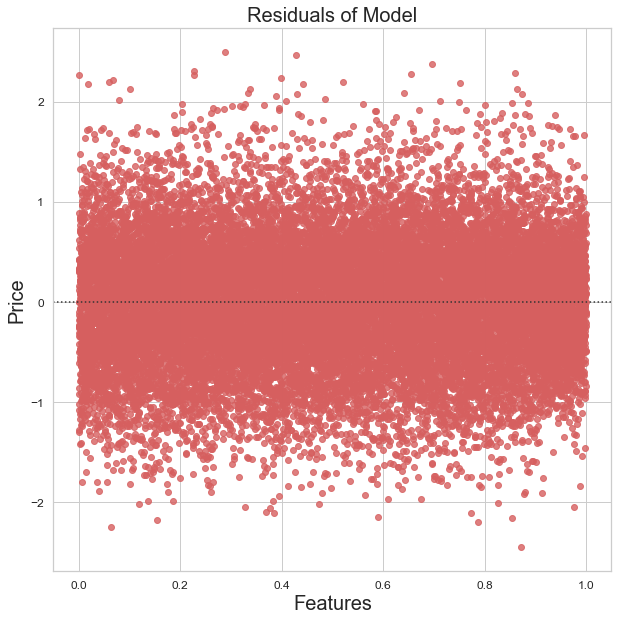

In [107]:
# Check residuals using sns.residplot
y_hat = linreg.predict()
residuals = data1['price_log'] - y_hat
x_vals = np.linspace(0, 1, len(residuals))

plt.figure(figsize=(10,10))
sns.residplot(x_vals, residuals, data = model_features, color='r')
plt.title('Residuals of Model', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
plt.show()

As there seems to be a lot of negative co-efficient, this may indicate there may be outliers which may need to be addressed. Lets have a look at the outliers and drop this for our next model.

# Multiple Linear Regression: Model 4

In [108]:
data2=data1

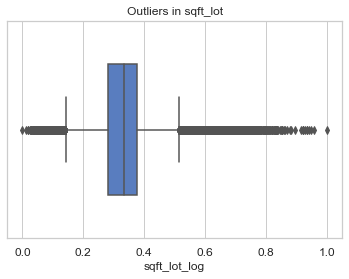

In [109]:
# Find outliers in sqft_lot
sns.boxplot(x=data2['sqft_lot_log'], fliersize=5, color='b', width=0.6)
plt.title('Outliers in sqft_lot')
plt.show()

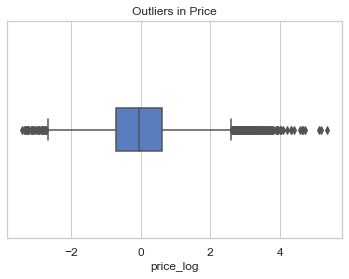

In [110]:
# Find outliers in price
sns.boxplot(x=data2['price_log'], fliersize=5, color='b', width=.2, whis=1.5)
plt.title('Outliers in Price')
plt.show()

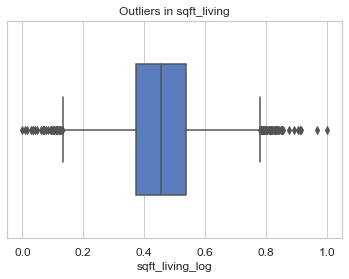

In [111]:
# Find outliers in sqft_living
sns.boxplot(x=data2['sqft_living_log'], fliersize=5, color='b', width=0.6)
plt.title('Outliers in sqft_living')
plt.show()

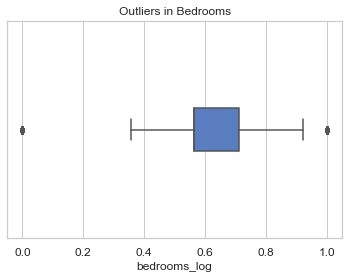

In [112]:
# Find outliers in bedrooms
sns.boxplot(x=data2['bedrooms_log'], fliersize=5, color='b', width=.2, whis=1.5)
plt.title('Outliers in Bedrooms')
plt.show()

In [113]:
# Import stats from scipy
from scipy import stats

# Identify the outliers 4 standard deviations away from mean in all columns
def remove_outliers(data2, column_name, threshold=4):
    z_scores = stats.zscore(data2[column_name])
    indices = np.abs(np.where(z_scores > threshold))
    return indices[0]
    
columns_to_check = ['bedrooms_log', 'sqft_living_log', 'sqft_lot_log','price_log']

all_indices = []
for column in columns_to_check:
    indices = remove_outliers(data2, column, threshold=4)
    all_indices.extend(indices)
all_indices = np.unique(all_indices)

In [114]:
# Remove outliers 4 standard deviations from mean in all columns
data3 = data2.drop(index=all_indices)
data3.shape

(21489, 15)

We were able to remove the outliers, and the data removed approx 100 records which is 0.5% of the total dataset. 

In [116]:
# Build a multiple linear regression model
model_features1 = pd.DataFrame(data=data3, columns = None)
model_features1 = data3.drop(['price_log', 'sqft_lot_log','age_young home','bedrooms_log'],axis=1)

X = model_features1
y = data3['price_log']

# Add a constant
X_int = sm.add_constant(X)
linreg = sm.OLS(y,X_int).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     2998.
Date:                Tue, 18 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:25:47   Log-Likelihood:                -20468.
No. Observations:               21489   AIC:                         4.096e+04
Df Residuals:                   21477   BIC:                         4.106e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.5388      0.026    -96.235      0.000      -2.591      -2.487
bathrooms_log           0.3557      0.054      6.533      0.000       0.249       0.462
floors_log              0.2546      0.021     12.191      0.000       0.214       0.296
sqft_living_log         2.9208      0.069     42.412      0.000       2.786       3.056
sqft_basement           0.0002   1.27e-05     12.907      0.000       0.000       0.000
Below 3                -0.3191      0.045     -7.043      0.000      -0.408      -0.230
Above Average Grade     0.9573      0.020     48.764      0.000       0.919       0.996
Average Grade           0.4246      0.016     26.116      0.000       0.393       0.457
Excellent Grade         1.8086      0.028     64.081      0.000       1.753       1.864
reno_YES                0.1120      0.024      4.633      0.000       0.065       0.159
waterfront_YES          1.0806      0.053     20.384      0.000       0.977       1.185
age_old home            0.5828      0.011     52.049      0.000       0.561       0.605
==============================================================================
Omnibus:                       13.993   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.023
Skew:                          -0.031   Prob(JB):                     0.000547
Kurtosis:                       3.114   Cond. No.                     9.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpretation:

Model Results:R-Squared = 0.606 → Selected features predicts 60.6% of the variance for price. 
F-Statistic = 2998. → Cannot confirm features are signficant.

Features: P-Values = 0 → Features predicting price isn't random. 
Coefficient = -2.5388 → Most significant coefficients have a positive correlation with price but the overall co-ef is negative.

Residuals:

Skewness = -0.031 → Residuals are negatively skewed. 
Kurtosis = 3.114 → Residuals do not fall within 3 standard deviations of mean. 
Jarque-Bera = 15.023 → Data is not normal.

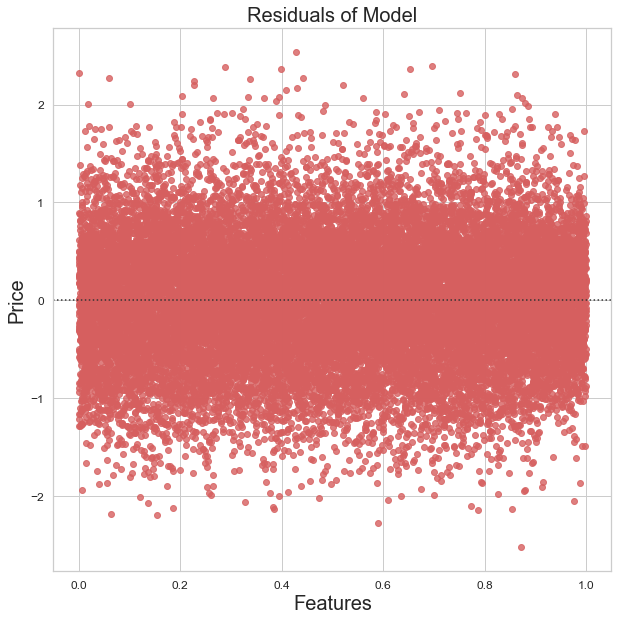

In [117]:
# Check residuals using sns.residplot
y_hat = linreg.predict()
residuals = data3['price_log'] - y_hat
x_vals = np.linspace(0, 1, len(residuals))

plt.figure(figsize=(10,10))
sns.residplot(x_vals, residuals, data = model_features1, color='r')
plt.title('Residuals of Model', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
plt.show()

With this dataset, we still have some multicollinearity issue. Lets look at feature ranking with RFE for our final model. 

# Build the final model

In [118]:
# Feature ranking with Recursive Feature Elimination
from sklearn.feature_selection import RFE

predictors = data3.drop('price_log', axis=1)

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 10)
selector = selector.fit(predictors, data3['price_log'])

In [119]:
print(list(zip(predictors, selector.support_)))
print(list(zip(predictors, selector.ranking_)))

[('sqft_lot_log', True), ('bedrooms_log', True), ('bathrooms_log', True), ('floors_log', False), ('sqft_living_log', True), ('sqft_basement', False), ('Below 3', True), ('Above Average Grade', True), ('Average Grade', True), ('Excellent Grade', True), ('reno_YES', False), ('waterfront_YES', True), ('age_old home', True), ('age_young home', False)]
[('sqft_lot_log', 1), ('bedrooms_log', 1), ('bathrooms_log', 1), ('floors_log', 3), ('sqft_living_log', 1), ('sqft_basement', 5), ('Below 3', 1), ('Above Average Grade', 1), ('Average Grade', 1), ('Excellent Grade', 1), ('reno_YES', 2), ('waterfront_YES', 1), ('age_old home', 1), ('age_young home', 4)]


In [120]:
#create a df with features from RFE
data4 = data3.drop(data3[['floors_log', 'sqft_basement', 'reno_YES','age_young home']], axis=1)

In [121]:
# Build a multiple linear regression model
model_features2 = pd.DataFrame(data=data4, columns = None)
model_features2 = data4.drop('price_log',axis=1)

X = model_features2
y = data4['price_log']

# Add a constant
X_int = sm.add_constant(X)
linreg = sm.OLS(y,X_int).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     3337.
Date:                Tue, 18 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:30:52   Log-Likelihood:                -20392.
No. Observations:               21489   AIC:                         4.081e+04
Df Residuals:                   21478   BIC:                         4.089e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.4468      0.027    -89.743      0.000      -2.500      -2.393
sqft_lot_log           -0.5401      0.043    -12.620      0.000      -0.624      -0.456
bedrooms_log           -0.6099      0.040    -15.217      0.000      -0.688      -0.531
bathrooms_log           0.5072      0.053      9.486      0.000       0.402       0.612
sqft_living_log         4.0972      0.077     53.281      0.000       3.946       4.248
Below 3                -0.3011      0.045     -6.658      0.000      -0.390      -0.212
Above Average Grade     0.9073      0.020     46.113      0.000       0.869       0.946
Average Grade           0.4053      0.016     24.846      0.000       0.373       0.437
Excellent Grade         1.7236      0.028     61.196      0.000       1.668       1.779
waterfront_YES          1.1056      0.053     20.928      0.000       1.002       1.209
age_old home            0.5965      0.011     55.690      0.000       0.576       0.618
==============================================================================
Omnibus:                       12.945   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.790
Skew:                          -0.031   Prob(JB):                      0.00101
Kurtosis:                       3.107   Cond. No.                         31.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

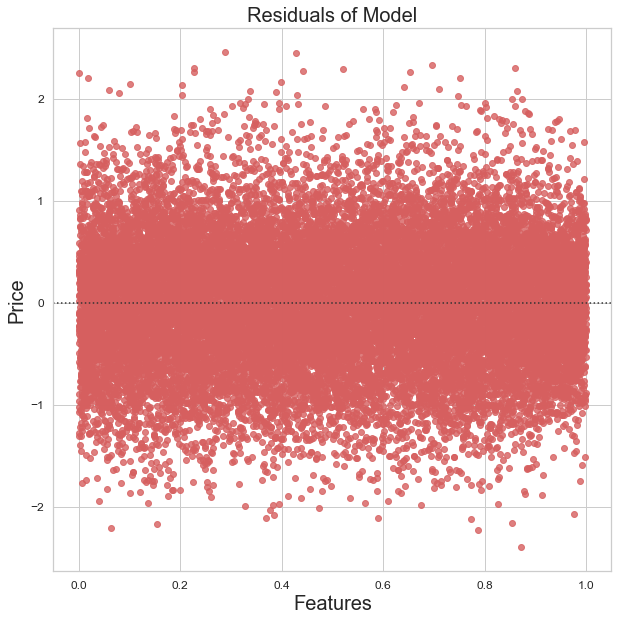

In [122]:
# Check residuals using sns.residplot
y_hat = linreg.predict()
residuals = data4['price_log'] - y_hat
x_vals = np.linspace(0, 1, len(residuals))

plt.figure(figsize=(10,10))
sns.residplot(x_vals, residuals, data = model_features2, color='r')
plt.title('Residuals of Model', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
plt.show()

Interpretation:

Model Results:R-Squared = 0.608 → Selected features predicts 60.8% of the variance for price. 
F-Statistic = 3337. → Cannot confirm features are signficant.

Features: P-Values = 0 → Features predicting price isn't random. 
Coefficient = -2.4468 → Most significant coefficients have a positive correlation with price but the overall co-ef is negative.

Residuals:
Skewness = -0.031 → Residuals are negatively skewed. 
Kurtosis = 3.107 → Residuals do not fall within 3 standard deviations of mean. 
Jarque-Bera = 13.790 → Data is not normal.

This model is much better than the baseline. The R-Squared is 0.608 , which indicates our model accounts for 60.8% of the variance in house prices.


# Perform Train-Test Split

In [131]:
# Run the same model in Scikit-learn
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_int, y)

LinearRegression()

In [132]:
# Analyze coefficients in Sklearn
linreg.coef_

array([ 0.        , -0.54013214, -0.60985496,  0.50719904,  4.09715641,
       -0.30112092,  0.90732972,  0.40525473,  1.72360392,  1.10559856,
        0.59651584])

In [133]:
# Model
model = sm.OLS(y,X_int).fit()

In [126]:
# Train-Test Split using Sklearn
from sklearn.model_selection import train_test_split

In [134]:
# Train-Test Split using Sklearn
X_train, X_test, y_train, y_test = train_test_split(X_int, y, test_size = 0.25)

In [135]:
# Preview of train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

16116 5373 16116 5373


In [139]:
# Fit the model and apply the model to the make test set predictions
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train, y_train)
y_hat_test = linreg.predict(X_test)

In [140]:
# Calculate residuals and mean squared error
from sklearn.metrics import mean_squared_error
test_residuals = y_hat_test - y_test

test_mse = mean_squared_error(y_test, y_hat_test)
test_mse

0.38984851974506096

# Perform Cross_Validation

In [141]:
# Compare MSE for predicted values on the train and test sets.
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [142]:
# Compare MSE for predicted values on the train and test sets.
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.39096613171899003
Test Mean Squarred Error: 0.38984851974506096


In [143]:
# Use cross-validation for results 5, 10, 20
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(linreg, X_int, y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X_int, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, X_int, y, cv=20, scoring="neg_mean_squared_error"))
print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

-0.39100372143334206
-0.3911278151603773
-0.39112539038229516


# Final Model Summary
The final iteration of the multiple linear regression model yields the final model to use to predict future housing prices. The selected features predict 60.8% of the variance of our target price. The resulting F-statistic doesn't prove that the use of the features will predict the target with total accuracy. The P-value indicates that all relationships aren't random and all feature coefficients reveal positive correlation except sqft_lot_log and Below 3 condition status. The data, given by our results, implies skewness and much of the data doen't fall within 3 standard deviations from the mean. Overall, using these selected features yields a valid final model. The condition number is acceptable and inicates reasonable correlation. A constant was added to the regression to aid the model in finding a best-fit line. To begin validating the model, a train & test procedure was performed for the purpose of splitting the data into smaller sections and iterating through the model again. The test mean-squarred error resulted in a value of 0.389. The train mean-squarred error resulted in a value of 0.39. If the test error is substantially worse then our train error, this is a sign that our model doesn't generalize well to future cases. In this case, our Train MSE is right on par with the Test MSE. This is a good sign - it means the model will hold true with new data. This model also was satisfactory when splitting the data into differenct sections, using the cross validation results method in SKlearn. The test yielded values very similar to the test MSE.

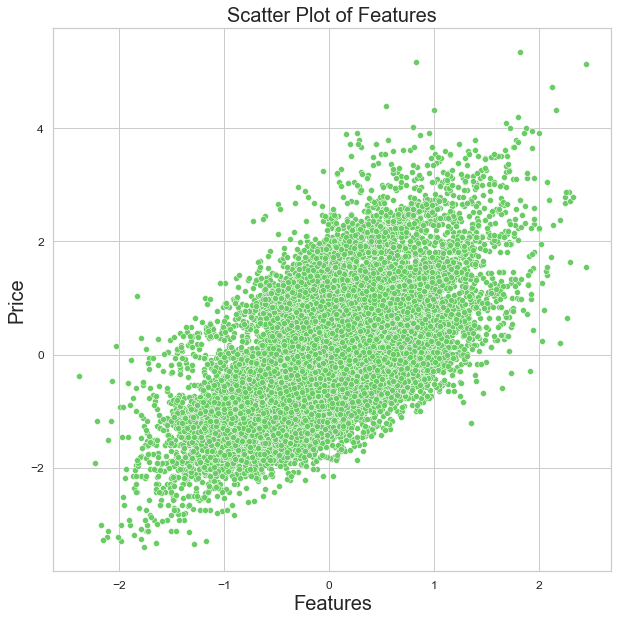

In [144]:
# Final scatterplot of features
plt.figure(figsize=(10,10))
sns.scatterplot(residuals, 'price_log', data = data4, color='g')
plt.title('Scatter Plot of Features', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
plt.show()

# Recommendations
To reiterate the usefulness of this business case, the scope of the project included housing data within King County, the economic health of buyers in the county, and the value of predictors that contribute to housing sales.

List of Recommendations:

*Increase Square Footage: This goes without saying - more square footage means a higher value for the house. Our model shows that when square footage is larger, the higher the price. To add onto square footage, consider making renovations to the first floor that could add a porch or a sun room.

*Waterfronts are Key: When a property sits on the waterfront, it's value is higher than the same property without a waterfront view. It's important to recognize this fact. 

*High Grade: Properties with excellent grade get a better price and are considered of a high value compared to properties with lower grades. 

*Condition is important: The condition of the property also impacts the price. Below 3 condition fetches a fairly low price compared to properties which have a higher condition rating of 4 and 5. 


# Conclusion
This wraps up the King County dataset project. In this project, I analyzed the 'King County House Sales' dataset with the purpose of predicting the future sale price of houses in King County as accurately as possible. The project cleaned, explored, and modeled this dataset with a multivariate linear regression to accomplish the purpose. This project followed a mixed methodology, called CRISP_DM and OSEMiN, to build a best-fit model. The process suggested to follow certain relational steps to help understand the data and build the model. The framework is now completed and recommendations have been given.

Further Work
If given more time and data, I would like to have known features about the owners of each property iD. Some examples could include the average income, age, children count, and if relatives live within the county. This could add indicators about which customers would fit into each property. Because this dataset given was from a snapshot in time in 2015, I would also like to analyze how covid would have impacted the property prices. Also, I would like to look at new upcoming suburbs around King County.